##### import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv("/kaggle/input/tunadromd-malware-detection/data.csv")
print(df.head())

In [102]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) import os for dirname, _, filenames in os.walk('/kaggle/input'): for filename in filenames: print(os.path.join(dirname, filename))

df=pd.read_csv("/kaggle/input/tunadromd-malware-detection-new/data.csv")
print(df.head())


     ID  ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
0  2000                   0.0                      0.0   
1  2001                   0.0                      0.0   
2  2002                   0.0                      0.0   
3  2003                   0.0                      0.0   
4  2004                   0.0                      0.0   

   ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  \
0                        0.0                     0.0                    0.0   
1                        0.0                     0.0                    0.0   
2                        0.0                     0.0                    0.0   
3                        0.0                     0.0                    0.0   
4                        0.0                     0.0                    0.0   

   ACCESS_FINE_LOCATION  ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  \
0                   0.0                             0.0                   0.0   
1             

In [103]:
df.columns

Index(['ID', 'ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM',
       'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION',
       'ACCESS_COARSE_UPDATES', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION',
       'ACCESS_MTK_MMHW',
       ...
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimOperator',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
       'Lorg/apache/http/impl/client/DefaultHttpClient;->execute', 'Label'],
      dtype='object', length=243)

In [104]:
print ((df.isnull().sum())>1)

ID                                                          False
ACCESS_ALL_DOWNLOADS                                        False
ACCESS_CACHE_FILESYSTEM                                     False
ACCESS_CHECKIN_PROPERTIES                                   False
ACCESS_COARSE_LOCATION                                      False
                                                            ...  
Landroid/telephony/TelephonyManager;->getSimOperatorName    False
Landroid/telephony/TelephonyManager;->getSimCountryIso      False
Landroid/telephony/TelephonyManager;->getSimSerialNumber    False
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    False
Label                                                       False
Length: 243, dtype: bool


In [105]:
df.dropna(inplace=True)

<Axes: >

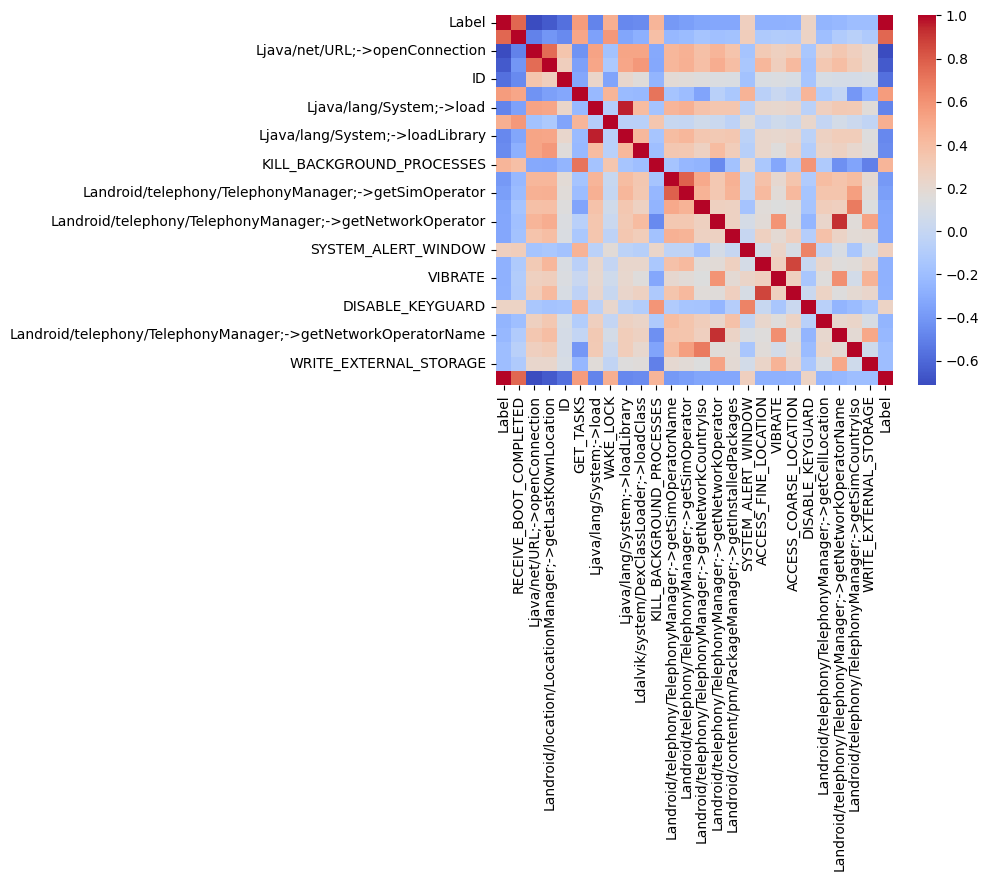

In [106]:
import seaborn as sns
correlations = df.corr()

# Sort the correlations with the target (assuming 'target' is the name of your target column)
target_correlations = correlations['Label'].abs().sort_values(ascending=False)

# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.2

# Select features with correlation above the threshold
selected_features = target_correlations[target_correlations > correlation_threshold].index.tolist()

# Visualize the correlations with a heatmap
sns.heatmap(df[selected_features + ['Label']].corr(), cmap='coolwarm')

In [107]:
def select_top_correlated_features(df, target_column, num_features=150, correlation_threshold=0.01):
    correlations = df.corr()
    target_correlations = correlations[target_column].abs().sort_values(ascending=False)
    selected_features = target_correlations[target_correlations > correlation_threshold].index.tolist()
    selected_features = selected_features[:num_features]
    return selected_features
target_column = 'Label'
selected_features = select_top_correlated_features(df, target_column, num_features=150, correlation_threshold=0.1)
print(selected_features)

['Label', 'RECEIVE_BOOT_COMPLETED', 'Ljava/net/URL;->openConnection', 'Landroid/location/LocationManager;->getLastK0wnLocation', 'ID', 'GET_TASKS', 'Ljava/lang/System;->load', 'WAKE_LOCK', 'Ljava/lang/System;->loadLibrary', 'Ldalvik/system/DexClassLoader;->loadClass', 'KILL_BACKGROUND_PROCESSES', 'Landroid/telephony/TelephonyManager;->getSimOperatorName', 'Landroid/telephony/TelephonyManager;->getSimOperator', 'Landroid/telephony/TelephonyManager;->getNetworkCountryIso', 'Landroid/telephony/TelephonyManager;->getNetworkOperator', 'Landroid/content/pm/PackageManager;->getInstalledPackages', 'SYSTEM_ALERT_WINDOW', 'ACCESS_FINE_LOCATION', 'VIBRATE', 'ACCESS_COARSE_LOCATION', 'DISABLE_KEYGUARD', 'Landroid/telephony/TelephonyManager;->getCellLocation', 'Landroid/telephony/TelephonyManager;->getNetworkOperatorName', 'Landroid/telephony/TelephonyManager;->getSimCountryIso', 'WRITE_EXTERNAL_STORAGE', 'CHANGE_NETWORK_STATE', 'Landroid/media/AudioRecord;->startRecording', 'USE_FINGERPRINT', 'REA

In [108]:
top_150_features = select_top_correlated_features(df, target_column, num_features=150, correlation_threshold=0.01)

null_values = df[top_150_features].isnull().sum()

print(null_values)

Label                                                      0
RECEIVE_BOOT_COMPLETED                                     0
Ljava/net/URL;->openConnection                             0
Landroid/location/LocationManager;->getLastK0wnLocation    0
ID                                                         0
                                                          ..
SDCARD_WRITE                                               0
MEDIA_BUTTON                                               0
ACCESS_MTK_MMHW                                            0
INTERACT_ACROSS_USERS                                      0
C2D_MESSAGE                                                0
Length: 150, dtype: int64


In [109]:
df['Label'].value_counts()

Label
1.0    3565
0.0     899
Name: count, dtype: int64

In [110]:
def unique_values_counts_summary(df):
    summary = {}
    for column in df.columns:
        unique_values_counts = df[column].value_counts()
        summary[column] = {'unique_values': unique_values_counts.index.tolist(), 'counts': unique_values_counts.tolist()}
    return summary
unique_values_summary = unique_values_counts_summary(df)

for column, values_counts in unique_values_summary.items():
    print("Column:", column)
    print("Unique Values:", values_counts['unique_values'])
    print("Counts:", values_counts['counts'])
    print("\n")

Column: ID
Unique Values: [2000, 4975, 4981, 4980, 4979, 4978, 4977, 4976, 4974, 4966, 4973, 4972, 4971, 4970, 4969, 4968, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4967, 4965, 5000, 4940, 4946, 4945, 4944, 4943, 4942, 4941, 4939, 4964, 4938, 4937, 4936, 4935, 4934, 4933, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4999, 5001, 4931, 5045, 5051, 5050, 5049, 5048, 5047, 5046, 5044, 5036, 5043, 5042, 5041, 5040, 5039, 5038, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5037, 5035, 5002, 5010, 5016, 5015, 5014, 5013, 5012, 5011, 5009, 5034, 5008, 5007, 5006, 5005, 5004, 5003, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 4932, 4930, 2001, 4835, 4841, 4840, 4839, 4838, 4837, 4836, 4834, 4826, 4833, 4832, 4831, 4830, 4829, 4828, 4842, 4843, 4844, 4845, 4846, 4847, 4

In [111]:
X = df.copy()
X=df[top_150_features]

X.drop('Label', axis= 1, inplace = True)

y = df['Label']

/tmp/ipykernel_32/1942172862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Label', axis= 1, inplace = True)


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
     

In [113]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [114]:
y_predict = classifier.predict(X_test)
print(y_predict)

[1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 91.26539753639418%
The precision score for the model is 91.74311926605505%
The recall score for the model is 97.9020979020979%


In [116]:
best_score = 0.0
dep = 0
for i in range (10,100):
  classifier = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 99.77603583426652 for max_depth 10


In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=30)
classifier.fit(X_train,y_train)
accuracy_score(y_test,y_predict)

0.9977603583426652

Random Forest


In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy")
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [119]:
y_predict1 = rf.predict(X_test)
y_predict1

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict1)
score2 = precision_score(y_test,y_predict1)
score3 = recall_score(y_test,y_predict1)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 99.88801791713325%
The precision score for the model is 99.86033519553072%
The recall score for the model is 100.0%


In [121]:
best_score = 0.0
dep = 0
for i in range (1,50):
  rf= RandomForestClassifier(criterion="entropy", max_depth=i)
  rf.fit(X_train,y_train)
  y_predict1 = rf.predict(X_test)
  score = accuracy_score(y_test,y_predict1)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 100.0 for max_depth 8


In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy", max_depth=dep)
rf.fit(X_train,y_train)
accuracy_score(y_test,y_predict1)

0.9988801791713325

In [167]:
test=pd.read_csv("/kaggle/input/tunadromd-malware-detection-new/test.csv")
test.head()

,ID,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,...,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute
0,3501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3505,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
test.shape
test.isnull().sum()

ID                                                          0
ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        1
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Length: 242, dtype: int64

In [169]:
test=test.fillna(method='ffill')

In [170]:
test.isnull().sum()

ID                                                          0
ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperator        0
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Length: 242, dtype: int64

In [171]:
if 'Label' in top_150_features:
    top_150_features.remove('Label')
test1=test[top_150_features]
test1.columns

Index(['RECEIVE_BOOT_COMPLETED', 'Ljava/net/URL;->openConnection',
       'Landroid/location/LocationManager;->getLastK0wnLocation', 'ID',
       'GET_TASKS', 'Ljava/lang/System;->load', 'WAKE_LOCK',
       'Ljava/lang/System;->loadLibrary',
       'Ldalvik/system/DexClassLoader;->loadClass',
       'KILL_BACKGROUND_PROCESSES',
       ...
       'Ljava/lang/Runtime;->exec', 'WRITE_CONTACTS', 'ACCESS_SUPERUSER',
       'READ_USER_DICTIONARY', 'ACCESS_MOCK_LOCATION', 'SDCARD_WRITE',
       'MEDIA_BUTTON', 'ACCESS_MTK_MMHW', 'INTERACT_ACROSS_USERS',
       'C2D_MESSAGE'],
      dtype='object', length=149)

In [172]:
X=test1
y = test1['ID']

In [173]:
fin_df=pd.DataFrame(y)

In [174]:
fin_df['Label']=pd.DataFrame(rf.predict(X))

In [175]:
fin_df

,ID,Label
0,3501,1.0
1,3502,1.0
2,3503,1.0
3,3504,1.0
4,3505,1.0
...,...,...
2959,6460,0.0
2960,6461,0.0
2961,6462,0.0
2962,6463,0.0


In [176]:
fin_df.to_csv('submission.csv',index=False)

In [177]:
sub=pd.read_csv('/kaggle/working/submission.csv')
sub.head(10)

,ID,Label
0,3501,1.0
1,3502,1.0
2,3503,1.0
3,3504,1.0
4,3505,1.0
5,3506,1.0
6,3507,1.0
7,3508,1.0
8,3509,1.0
9,3510,1.0


In [178]:
sub.shape

(2964, 2)

In [179]:
sub=sub.fillna(0)

In [180]:
sub.to_csv('submission.csv',index=False)